In [74]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq

In [86]:
#Using data uploaded from github to data
github_url = 'https://raw.githubusercontent.com/AlyanaJusino/Adv-Lab-5/refs/heads/main/Physics%20Lab%205%20.csv'

# Using dataframe to create the rows and columns of the data, organizing it by title
df = pd.read_csv(github_url, header=None, names=['T_ms', 'Data', 'Data Unfiltered'])



In [97]:
#test print to see if data is correctly written
print(df)

      T_ms  Data  Data Unfiltered
0        0     0              494
1      100     0              214
2      199     0              190
3      300     0              169
4      400     0              199
..     ...   ...              ...
364  36569     0              628
365  36670     0              674
366  36770     0              714
367  36871     0              750
368  36971     0              781

[369 rows x 3 columns]


In [98]:
#separating into an array for the specific column
T_ms = df['T_ms'].values
Data = df['Data'].values
Data_Unfiltered = df['Data Unfiltered'].values

In [105]:
#converting and equations
T_ins = T_ms/1000 #ms to s
fft_r = np.fft.fft(Data)
fft_freq = np.fft.fftfreq(len(Data), dt)

dt = np.mean(np.diff(T_ins)) #avg
fs = 1 / dt #freq

mag = np.abs(fft_r)
positive_freq_idx= np.where(fft_freq >=0)

N = len(Data_Unfiltered)
yf = fft(Data_Unfiltered)
xf = fftfreq(N, 1 / 1000)

M = len(Data)
yf_sq = fft(Data)
xf_sq = fftfreq(M, 1 / 1000)

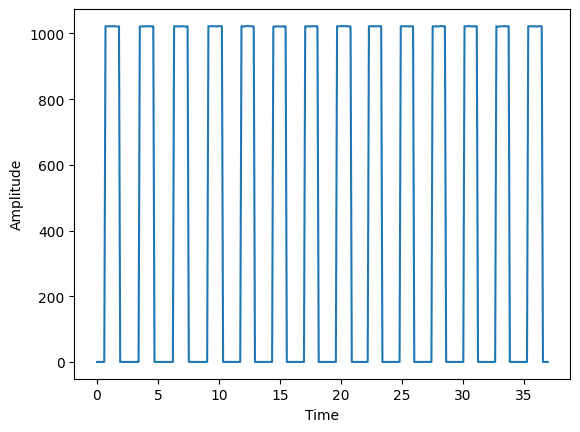

In [106]:
fig,ax = plt.subplots()
ax.plot(T_ins, Data)
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
plt.show()

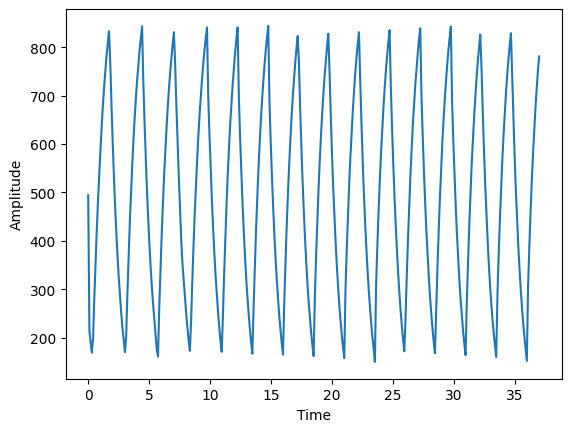

In [107]:
fig,ax = plt.subplots()
ax.plot(T_ins, Data_Unfiltered)
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
plt.show()

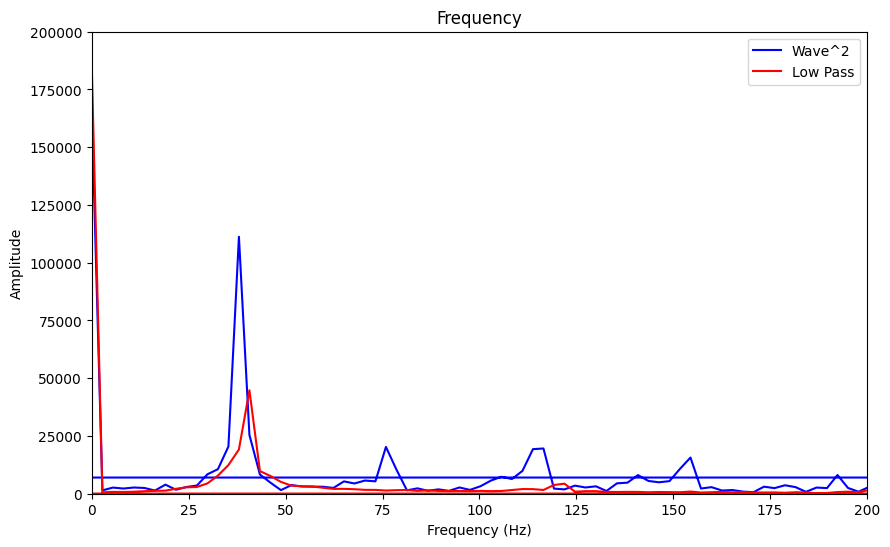

In [101]:
fig, ax = plt.subplots(figsize=[10, 6])
ax.plot(xf_sq, np.abs(yf_sq), color='blue', label='Wave^2')
ax.plot(xf, np.abs(yf), color='red', label='Low Pass')

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
ax.set_title('Frequency')
ax.legend()
ax.set_xlim(0, 200)
ax.set_ylim(0, 200000)

plt.show()